In [1]:
# Import tensorflow
import tensorflow as tf

3


In [2]:
# Downloads digit dataset from tensorflow 
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


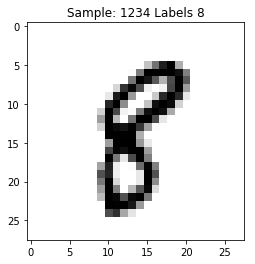

In [13]:
# Plotting sample
import matplotlib.pyplot as plt

def display_sample(num):
    print(mnist.train.labels[num])
    labels = mnist.train.labels[num].argmax(axis=0)
    image = mnist.train.images[num].reshape([28,28])
    plt.title("Sample: {} Labels {}".format(num,labels))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

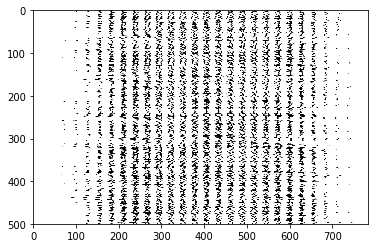

In [4]:
# Plotting dataset
import numpy as np

images = mnist.train.images[0].reshape([1,784])

for i in range(1,500):
    images = np.concatenate((images,mnist.train.images[i].reshape(1,784)))
    
plt.imshow(images,cmap=plt.get_cmap('gray_r')) 
plt.show()

In [5]:
# Input parameter and output classes
input_images = tf.placeholder(tf.float32,shape=[None,784])
target_labels = tf.placeholder(tf.float32,shape=[None,10])

In [6]:
# Layering the fully connected layers
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784,hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_biases = tf.Variable(tf.zeros([10]))

In [7]:
input_layer = tf.matmul(input_images,input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digits_weights = tf.matmul(hidden_layer,hidden_weights)+hidden_biases

In [8]:
# Loss function
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=digits_weights, labels=target_labels)) 

In [9]:
# Optimizer for adjusting weight to minimize loss
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [10]:
correct_prediction = tf.equal(tf.argmax(digits_weights,1),tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [11]:
Training data for 20 epoch
tf.global_variables_initializer().run()

for x in range(2000):
    batch =mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images:batch[0],target_labels:batch[1]})
    
    if((x+1)%100==0):
      print("Training epoch"+ str(x+1))
      print("Accuracy: " + str(accuracy.eval(feed_dict={input_images:mnist.test.images,
                                                        target_labels:mnist.test.labels})))

Training epoch100
Accuracy: 0.8681
Training epoch200
Accuracy: 0.8878
Training epoch300
Accuracy: 0.8951
Training epoch400
Accuracy: 0.9016
Training epoch500
Accuracy: 0.9042
Training epoch600
Accuracy: 0.9108
Training epoch700
Accuracy: 0.914
Training epoch800
Accuracy: 0.9131
Training epoch900
Accuracy: 0.9129
Training epoch1000
Accuracy: 0.9243
Training epoch1100
Accuracy: 0.926
Training epoch1200
Accuracy: 0.9275
Training epoch1300
Accuracy: 0.9256
Training epoch1400
Accuracy: 0.9266
Training epoch1500
Accuracy: 0.9279
Training epoch1600
Accuracy: 0.9294
Training epoch1700
Accuracy: 0.9318
Training epoch1800
Accuracy: 0.9322
Training epoch1900
Accuracy: 0.9325
Training epoch2000
Accuracy: 0.9307


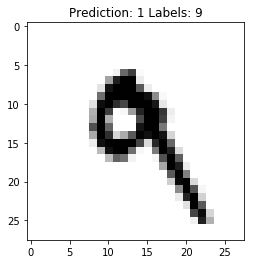

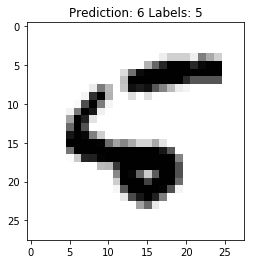

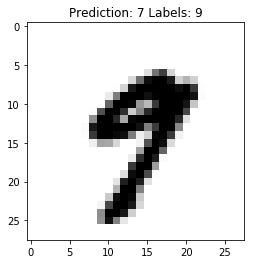

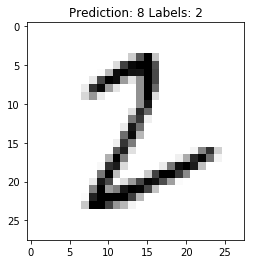

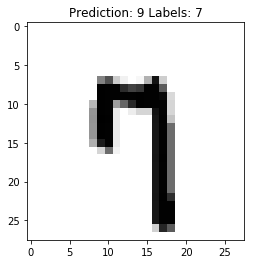

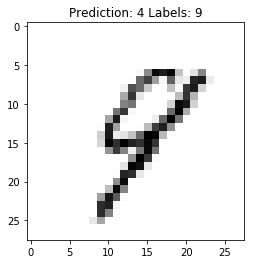

In [12]:
# Misclassified data
for x in range(100):
    x_train=mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    
    labels = y_train.argmax()
    
    prediction = sess.run(digits_weights,feed_dict={input_images:x_train}).argmax()
    
    if (prediction!=labels):
        plt.title("Prediction: {} Labels: {}".format(prediction,labels))
        plt.imshow(x_train.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()